In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import matplotlib.ticker as ticker

# banco de dados
db = "D:/monografia/_dva/db/dva.db"
conn = sqlite3.connect(db)
# conn.close()

query = """SELECT 
    d.ANO,
    s.SETOR,
    --ROUND(SUM(d.VATD) * 0.0000001, 2) AS VATD,
    ROUND((SUM(d.VATD) * 0.0000001) / total_vatd_ano * 100, 2) AS VATD_PERCENTUAL
FROM 
    dva_igpdi d
RIGHT JOIN 
    setores s ON s.SETOR_ATIV = d.SETOR_ATIV
LEFT JOIN 
    (SELECT 
         ANO, 
         SUM(VATD) * 0.0000001 AS total_vatd_ano
     FROM 
         dva_igpdi
     GROUP BY 
         ANO) AS total 
    ON d.ANO = total.ANO
GROUP BY 
    d.ANO, s.SETOR, total.total_vatd_ano
ORDER BY 
    d.ANO, s.SETOR;"""

dados = pd.read_sql_query(query, conn)
print(dados.columns)
dados.head()

Index(['ANO', 'SETOR', 'VATD_PERCENTUAL'], dtype='object')
Index(['ANO', 'SETOR', 'VATD_PERCENTUAL'], dtype='object')


,ANO,SETOR,VATD_PERCENTUAL
0,2009,Comércio e Serviços,4.71
1,2009,Financeiro,13.51
2,2009,Indústria,22.30
3,2009,Infraestrutura e Energia,58.06
4,2009,Outros,1.42


In [4]:
# Fazer o pivot
df = dados.pivot(index='ANO', columns='SETOR', values='VATD_PERCENTUAL')

# Resetar o índice para transformar o index ANO em coluna novamente
df.reset_index(inplace=True)

df = df.drop(columns=['Outros'])

df.head()

SETOR,ANO,Comércio e Serviços,Financeiro,Indústria,Infraestrutura e Energia
0,2009,4.71,13.51,22.30,58.06
1,2010,4.53,16.71,27.49,50.66
2,2011,5.32,16.53,28.68,48.94
3,2012,6.92,18.21,25.85,48.18
4,2013,7.34,18.22,30.88,43.33


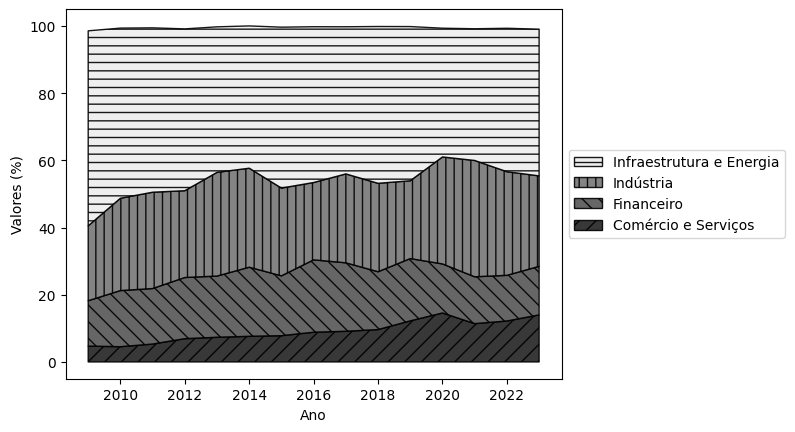

In [30]:
# Definindo as cores e padrões de hachura
colors = ['#222', '#555', '#777', '#eee']
hatches = ['//','\\\\','||','--']

fig, ax = plt.subplots()

# Plotando cada área individualmente com hachuras
areas = [df[col] for col in df.columns if col != 'ANO']
labels = [col for col in df.columns if col != 'ANO']
Ano = df['ANO']

for i, area in enumerate(areas):
    ax.fill_between(Ano, sum(areas[:i]), sum(areas[:i+1]),
     facecolor=colors[i], hatch=hatches[i], edgecolor='black', alpha=0.9, label=labels[i])

# Invertendo a ordem dos rótulos
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], loc='upper left')
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('Ano')
ax.set_ylabel('Valores (%)')
plt.show()

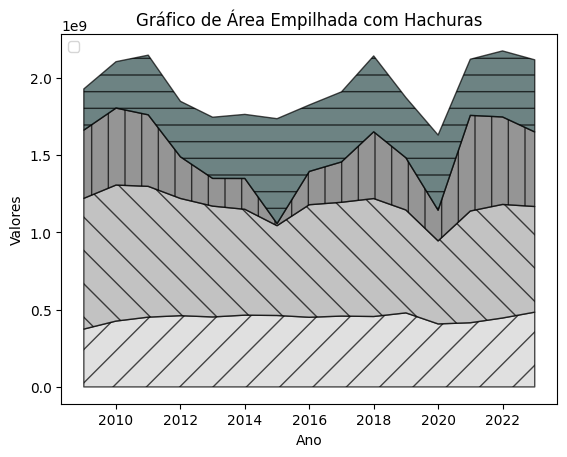

In [9]:
# Agrupar por 'ANO' e somar os valores dentro de cada grupo
dados_agrupados = dados.groupby('ANO').sum().reset_index()

# Extraindo os dados agrupados
Ano = dados_agrupados['ANO']
Pessoal = dados_agrupados['Pessoal']
Governo = dados_agrupados['Governo']
RCP = dados_agrupados['RCP']
RCT = dados_agrupados['RCT']

# Definindo as cores e padrões de hachura
colors = ['#d3d3d3', '#a9a9a9', '#696969', '#333333']
hatches = ['/', '\\', '|', '-']

fig, ax = plt.subplots()

# Plotando cada área individualmente com hachuras
areas = [Pessoal, Governo, RCP, RCT]
labels = ['Pessoal', 'Governo', 'RCP', 'RCT']
for i, area in enumerate(areas):
    ax.fill_between(Ano, sum(areas[:i]), sum(areas[:i+1]), facecolor=colors[i], hatch=hatches[i], edgecolor='black', alpha=0.7)

# Invertendo a ordem dos rótulos
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

ax.set_xlabel('Ano')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de Área Empilhada com Hachuras')
plt.show()

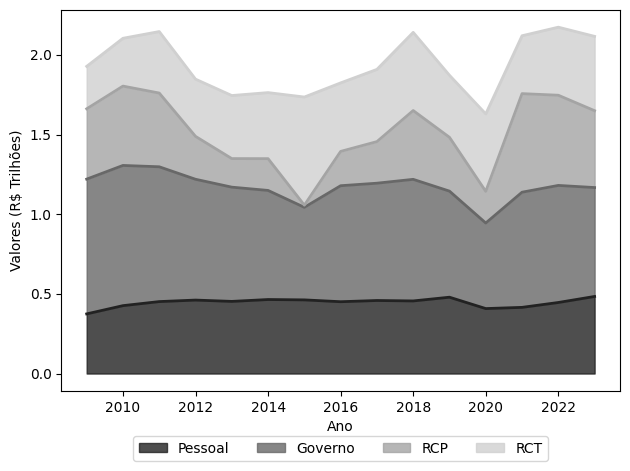

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'dados' é um DataFrame pandas já carregado

# Agrupando os dados
dados_agrupados = dados.groupby('ANO').sum().reset_index()

# Extraindo os dados agrupados
Ano = dados_agrupados['ANO']
Pessoal = dados_agrupados['Pessoal']
Governo = dados_agrupados['Governo']
RCP = dados_agrupados['RCP']
RCT = dados_agrupados['RCT']

# Calculando as áreas empilhadas
Pessoal_acumulado = Pessoal
Governo_acumulado = Pessoal_acumulado + Governo
RCP_acumulado = Governo_acumulado + RCP
RCT_acumulado = RCP_acumulado + RCT

# Definindo a paleta de cores e estilos das linhas
colors = ['#222', '#686868', '#A4A4A4', '#D0D0D0']
line_width = 2

# Plotando o gráfico de área empilhada
plt.fill_between(Ano, 0, Pessoal, color=colors[0], label='Pessoal', alpha=0.8)
plt.fill_between(Ano, Pessoal, Governo_acumulado, color=colors[1], label='Governo', alpha=0.8)
plt.fill_between(Ano, Governo_acumulado, RCP_acumulado, color=colors[2], label='RCP', alpha=0.8)
plt.fill_between(Ano, RCP_acumulado, RCT_acumulado, color=colors[3], label='RCT', alpha=0.8)

# Adicionando bordas diferentes com cores e grossura de linha ajustadas
plt.plot(Ano, Pessoal, color=colors[0], linestyle='-', linewidth=line_width)  # Linha de borda para Pessoal
plt.plot(Ano, Governo_acumulado, color=colors[1], linestyle='-', linewidth=line_width)  # Linha de borda para Governo
plt.plot(Ano, RCP_acumulado, color=colors[2], linestyle='-', linewidth=line_width)     # Linha de borda para RCP
plt.plot(Ano, RCT_acumulado, color=colors[3], linestyle='-', linewidth=line_width)     # Linha de borda para RCT

# Adicionando a legenda abaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

# Ajustando o formato dos valores no eixo y
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1e6/1000):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1e6/1000:.1f}'))


plt.xlabel('Ano')
plt.ylabel('Valores (R$ Trilhões)')
# plt.title('Gráfico de Área Empilhada com Linhas Personalizadas')
plt.tight_layout()  # Ajusta o layout para garantir que tudo caiba bem no gráfico

plt.savefig('grafico_empilhado.svg', format='svg')

plt.show()
